In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv(r"C:\Users\merie\Desktop\armenian_credit_data.csv")
df.head()


,Full_Name,Age,Marital_Status,Employment_Status,Income_AMD,Education_Level,Loan_Amount_AMD,Loan_Purpose,Collateral,FICO_Score,Debt_to_Income_Ratio,Num_Open_Credit_Lines,Previous_Defaults,Loan_Term,Interest_Rate,Employment_Duration_Years,Alternative_Income_AMD,Creditworthiness
0,Ruben Vardanyan,56,Widowed,Employed,2290000,Master's,4000000,Mortgage loan,Yes,433,0.18,3,4,24,9.21,0,1750000,Low
1,Suren Sargsyan,69,Single,Employed,910000,High School,4700000,Agricultural loan,No,358,0.47,3,4,12,15.60,48,800000,Low
2,Hasmik Avetisyan,46,Widowed,Self-Employed,250000,Bachelor's,2850000,Leasing finance,No,389,0.42,1,3,36,12.51,7,500000,Low
3,Meline Vardanyan,32,Married,Employed,1930000,Master's,2350000,Loan granted to financial institutions,Yes,369,0.26,1,0,24,18.15,1,4500000,Very Low
4,Hasmik Ghazaryan,60,Divorced,Self-Employed,1750000,Master's,1800000,Agricultural loan,No,484,0.42,2,3,24,15.60,40,4950000,Low


In [4]:
df['Creditworthiness'].unique()


array(['Low', 'Very Low', 'Medium', 'High', 'Very High'], dtype=object)

In [5]:

df["Creditworthiness"].value_counts()

Creditworthiness
Low          2776
Very Low     1443
Medium        455
High          226
Very High     100
Name: count, dtype: int64

In [6]:
print(df.isnull().sum())

Full_Name                    0
Age                          0
Marital_Status               0
Employment_Status            0
Income_AMD                   0
Education_Level              0
Loan_Amount_AMD              0
Loan_Purpose                 0
Collateral                   0
FICO_Score                   0
Debt_to_Income_Ratio         0
Num_Open_Credit_Lines        0
Previous_Defaults            0
Loan_Term                    0
Interest_Rate                0
Employment_Duration_Years    0
Alternative_Income_AMD       0
Creditworthiness             0
dtype: int64


In [7]:
df.drop(columns=['Full_Name'], axis=1, inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder
feature_cols = ["Marital_Status", "Employment_Status", "Education_Level", "Collateral", "Loan_Purpose"]
le = LabelEncoder()


for col in feature_cols:
    df[col] = le.fit_transform(df[col])
df.head()


,Age,Marital_Status,Employment_Status,Income_AMD,Education_Level,Loan_Amount_AMD,Loan_Purpose,Collateral,FICO_Score,Debt_to_Income_Ratio,Num_Open_Credit_Lines,Previous_Defaults,Loan_Term,Interest_Rate,Employment_Duration_Years,Alternative_Income_AMD,Creditworthiness
0,56,3,0,2290000,2,4000000,6,1,433,0.18,3,4,24,9.21,0,1750000,Low
1,69,2,0,910000,1,4700000,0,0,358,0.47,3,4,12,15.60,48,800000,Low
2,46,3,2,250000,0,2850000,3,0,389,0.42,1,3,36,12.51,7,500000,Low
3,32,1,0,1930000,2,2350000,4,1,369,0.26,1,0,24,18.15,1,4500000,Very Low
4,60,0,2,1750000,2,1800000,0,0,484,0.42,2,3,24,15.60,40,4950000,Low


In [9]:
from sklearn.model_selection import train_test_split
x, y = df.iloc[ : , (df.columns != 'Creditworthiness')], df['Creditworthiness']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)


In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)  
y_test = label_encoder.transform(y_test)    
y_val = label_encoder.transform(y_val)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_val)

test_accuracy = accuracy_score(y_val, y_pred)
print(f'Test accuracy: {test_accuracy:.4f}')

print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))

Test accuracy: 0.9960

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.99      1.00      1.00       542
           2       0.99      0.97      0.98        93
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00       309

    accuracy                           1.00      1000
   macro avg       1.00      0.99      0.99      1000
weighted avg       1.00      1.00      1.00      1000


Confusion Matrix:
 [[ 36   0   1   0   0]
 [  0 542   0   0   0]
 [  0   3  90   0   0]
 [  0   0   0  19   0]
 [  0   0   0   0 309]]


In [17]:

from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=10, scoring = 'accuracy', n_jobs=-1, verbose=2) 
grid_search.fit(x_train, y_train)

best_rf = grid_search.best_estimator_

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)  



Fitting 10 folds for each of 144 candidates, totalling 1440 fits
Best Parameters:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best Score:  0.9966666666666667


In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_pred = best_rf.predict(x_test)

test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {test_accuracy:.4f}')

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test accuracy: 0.9970

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.99      1.00      1.00       556
           2       1.00      0.97      0.98        96
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00       294

    accuracy                           1.00      1000
   macro avg       1.00      0.99      1.00      1000
weighted avg       1.00      1.00      1.00      1000


Confusion Matrix:
 [[ 39   0   0   0   0]
 [  0 556   0   0   0]
 [  0   3  93   0   0]
 [  0   0   0  15   0]
 [  0   0   0   0 294]]


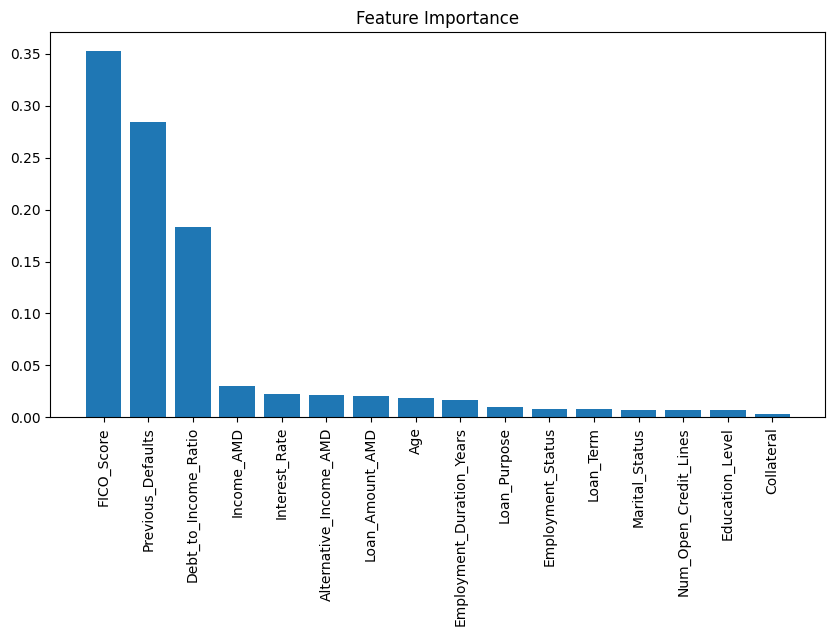

In [19]:
feature_importance = best_rf.feature_importances_
feature_names = x.columns

sorted_idx = feature_importance.argsort()[::-1]
plt.figure(figsize=(10, 5))
plt.bar(range(x.shape[1]), feature_importance[sorted_idx], align="center")
plt.xticks(range(x.shape[1]), np.array(feature_names)[sorted_idx], rotation=90)
plt.title("Feature Importance")
plt.show()

In [ ]:
from sklearn.tree import export_text


best_rf = grid_search.best_estimator_


one_tree = best_rf.estimators_[0]


print(export_text(one_tree, feature_names=feature_names))


|--- Employment_Status <= 1.47
|   |--- Debt_to_Income_Ratio <= 1.06
|   |   |--- Debt_to_Income_Ratio <= -0.37
|   |   |   |--- Previous_Defaults <= 0.36
|   |   |   |   |--- Interest_Rate <= -1.72
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- Interest_Rate >  -1.72
|   |   |   |   |   |--- Debt_to_Income_Ratio <= -0.44
|   |   |   |   |   |   |--- Employment_Duration_Years <= 2.73
|   |   |   |   |   |   |   |--- FICO_Score <= 0.01
|   |   |   |   |   |   |   |   |--- class: 4.0
|   |   |   |   |   |   |   |--- FICO_Score >  0.01
|   |   |   |   |   |   |   |   |--- Loan_Amount_AMD <= 1.41
|   |   |   |   |   |   |   |   |   |--- Loan_Amount_AMD <= -0.88
|   |   |   |   |   |   |   |   |   |   |--- FICO_Score <= 1.39
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- FICO_Score >  1.39
|   |   |   |   |   |   |   |   |   |   |   |--- class: 3.0
|   |   |   |   |   |   |   |   |   |--- Loan_Amount_AMD > 

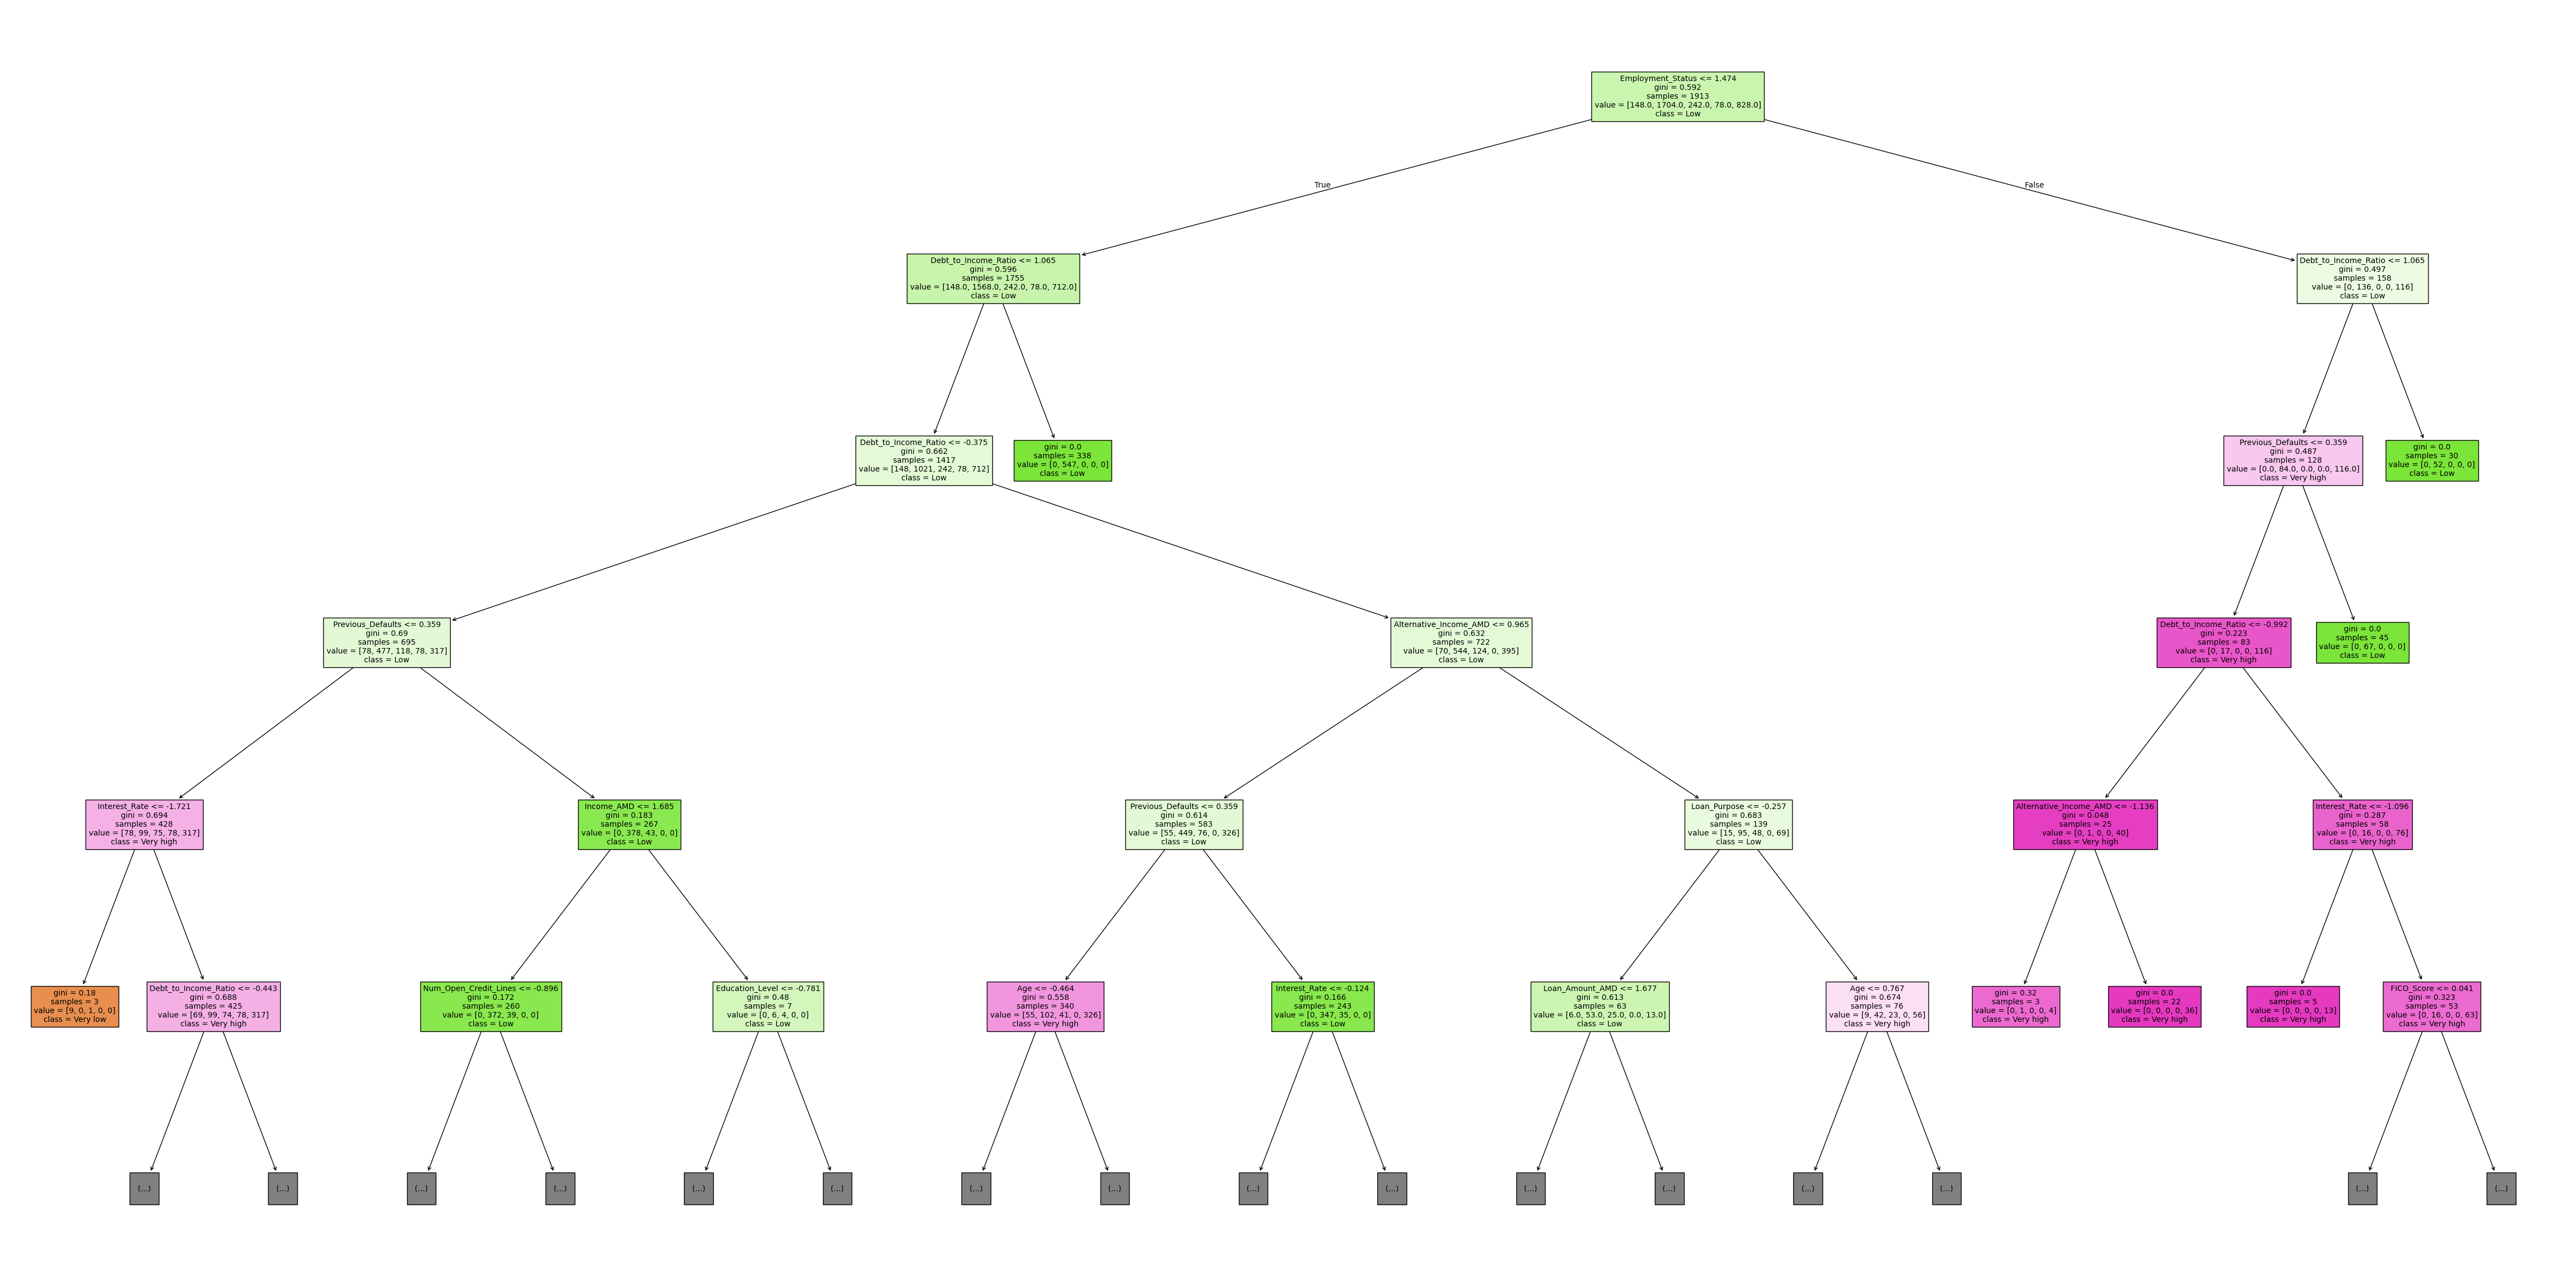

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(60, 30))  
plot_tree(
    one_tree,
    max_depth = 5,
    feature_names=feature_names,
    class_names=['Very low', 'Low', 'Medium', 'High', 'Very high'],
    filled=True,
    fontsize=10  
)
plt.savefig("decision_tree_diploma.png", dpi=300, bbox_inches='tight')  
plt.show()



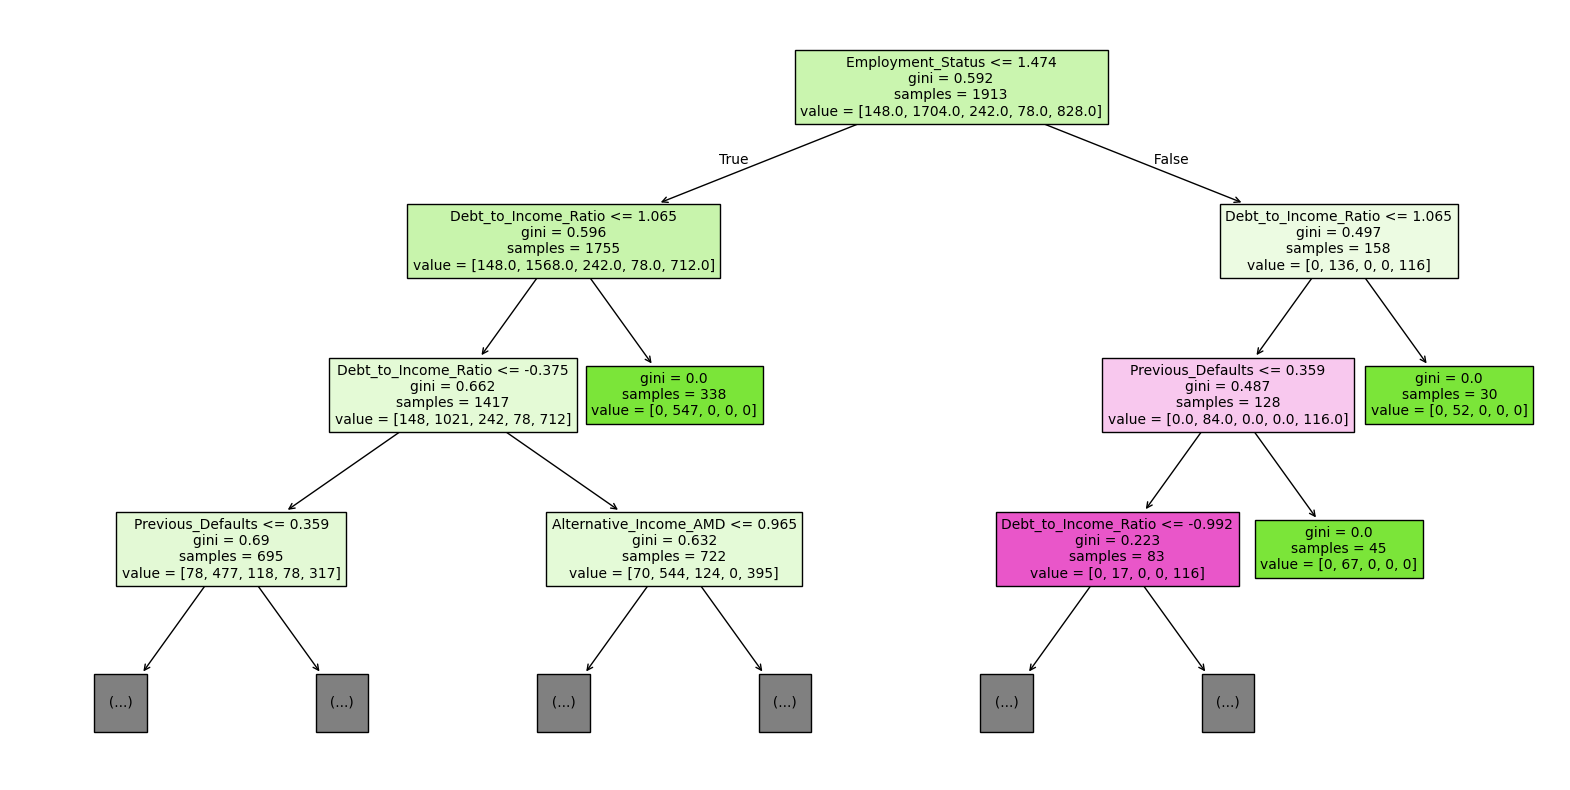

In [32]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(one_tree, feature_names=feature_names, filled=True, max_depth=3, fontsize=10)
plt.show()


In [34]:
import joblib

joblib.dump(one_tree, 'creditworthiness.pkl')


['creditworthiness.pkl']